In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-crashes/Motor_Vehicle_Collisions_-_Crashes.csv


In [2]:
df = pd.read_csv("/kaggle/input/car-crashes/Motor_Vehicle_Collisions_-_Crashes.csv")
df

/tmp/ipykernel_19/2489152644.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/car-crashes/Motor_Vehicle_Collisions_-_Crashes.csv")


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018958,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2018959,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2018960,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2018961,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


<Axes: >

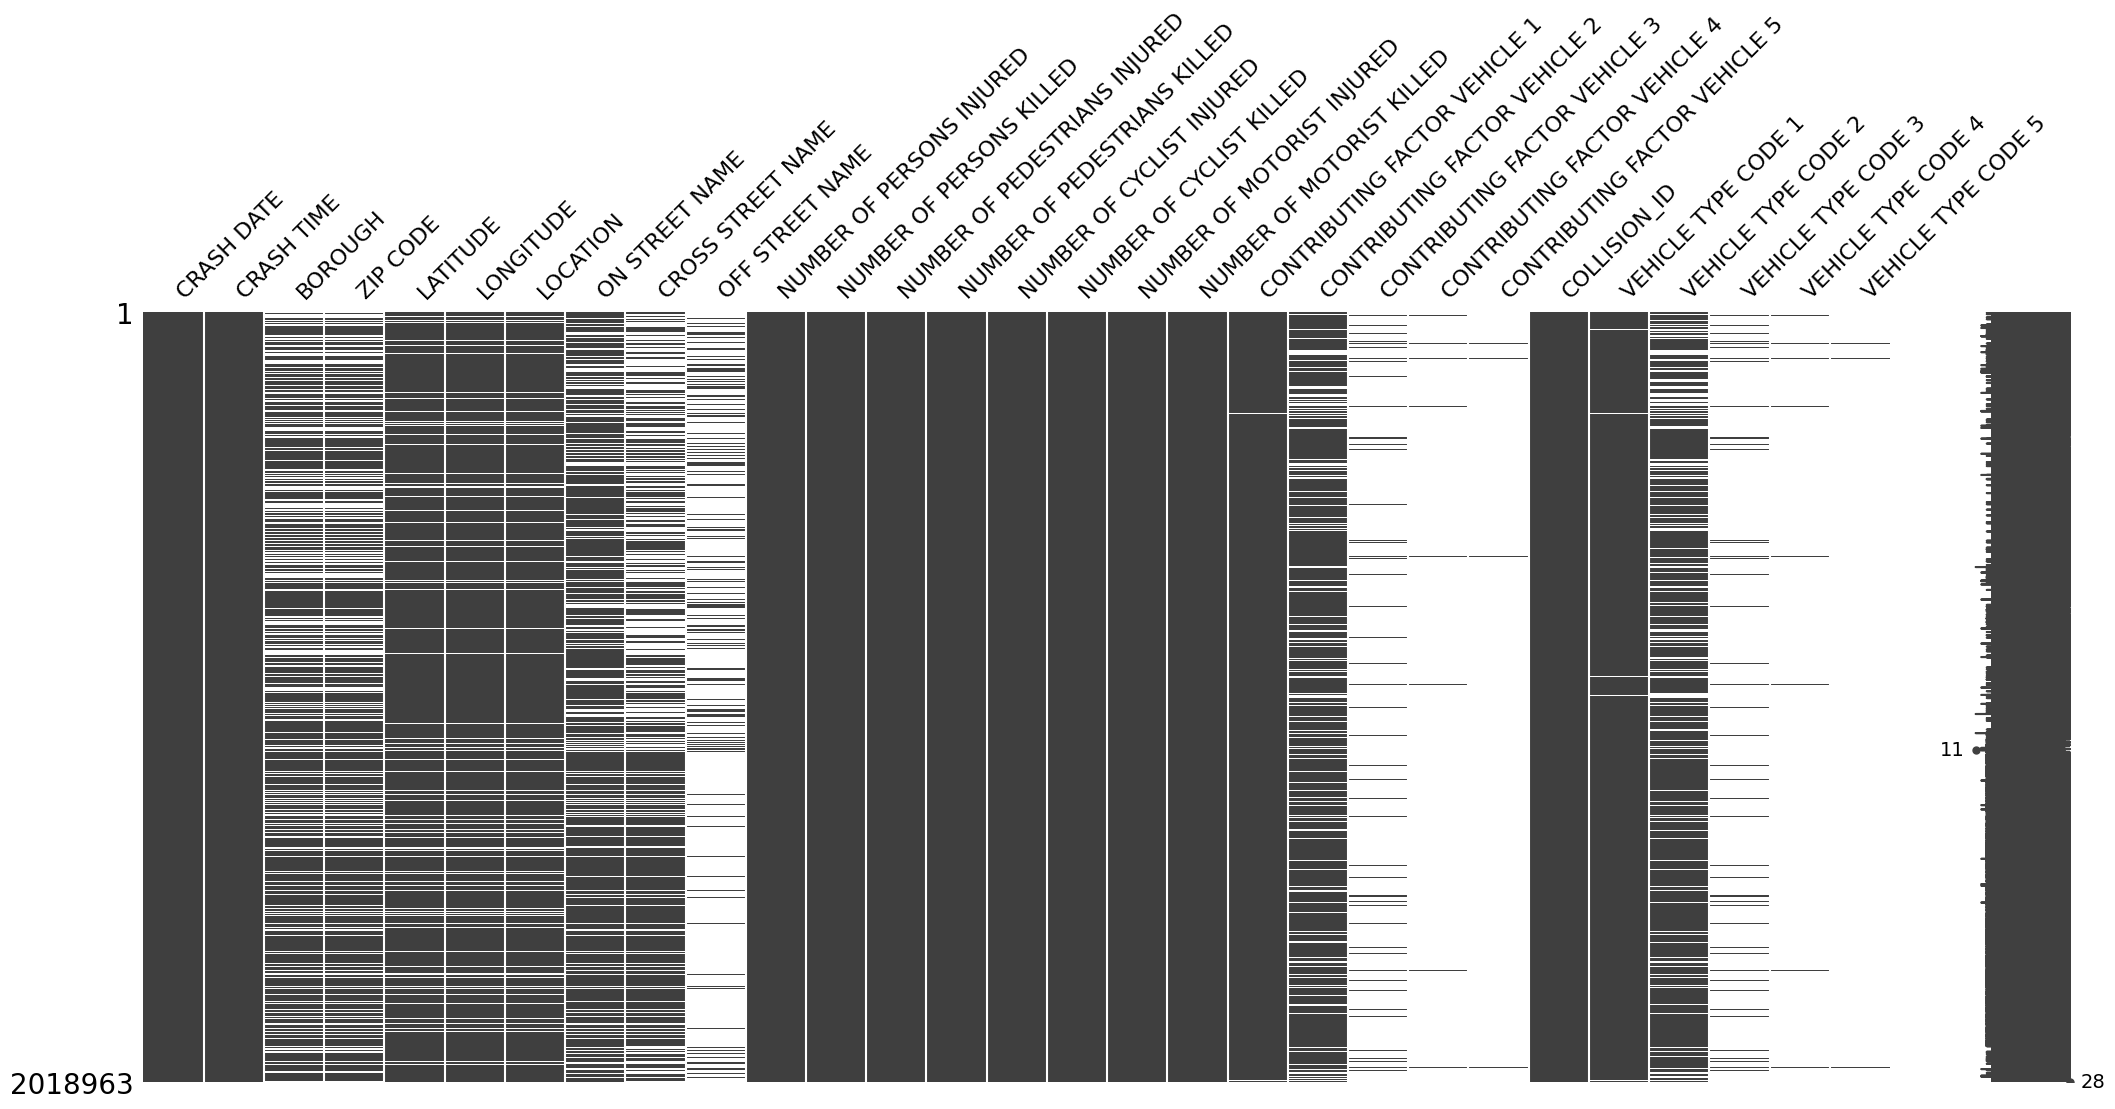

In [3]:
# checking for missing value
import missingno as msno
msno.matrix(df)

In [4]:
to_drop = ['ZIP CODE', 'LATITUDE', 'LONGITUDE','LOCATION','OFF STREET NAME', 
           'CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5',
           'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5', 'COLLISION_ID', 'CRASH DATE']
df = df.drop(to_drop, axis = 1)
df = df.dropna()

<Axes: >

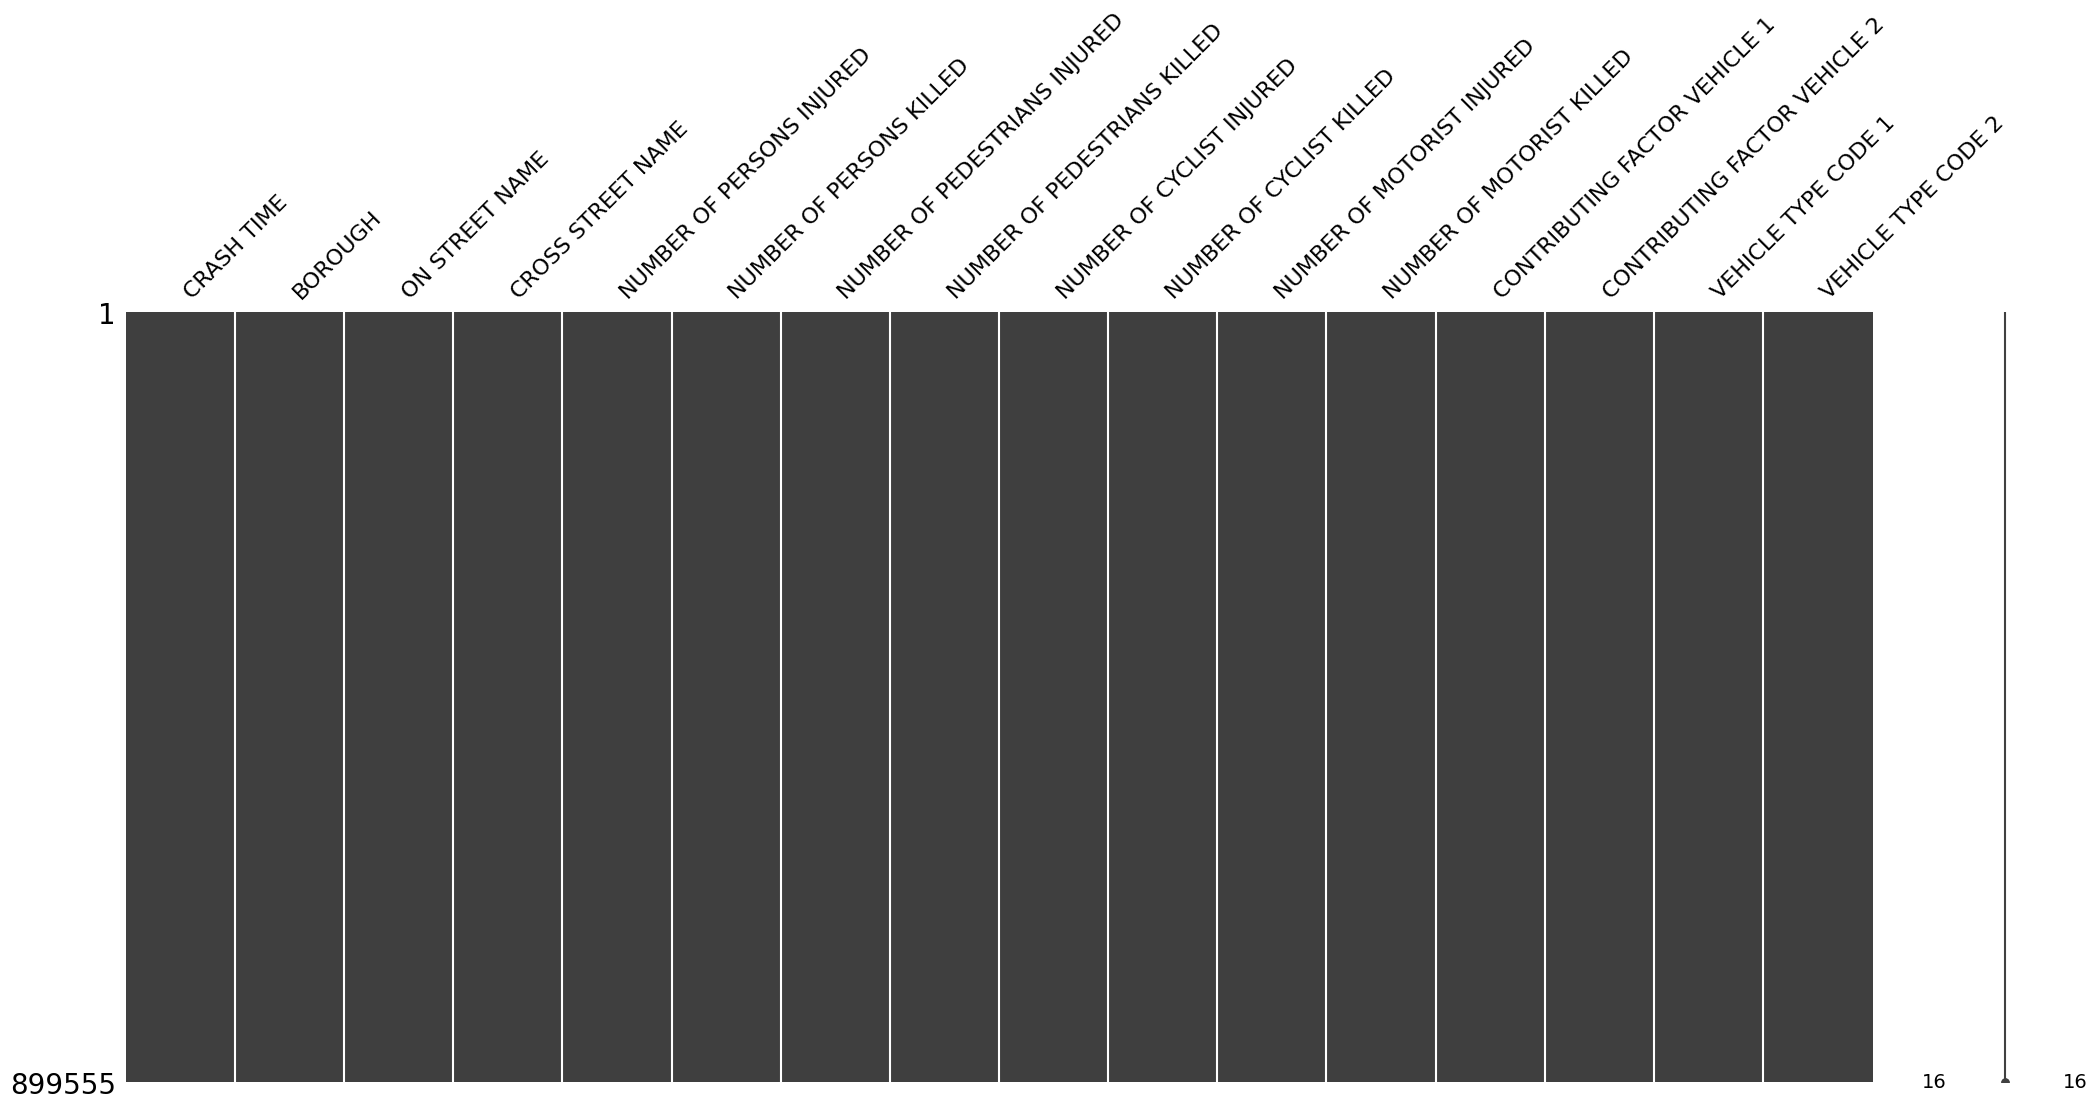

In [5]:
msno.matrix(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 899555 entries, 9 to 2018961
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH TIME                     899555 non-null  object 
 1   BOROUGH                        899555 non-null  object 
 2   ON STREET NAME                 899555 non-null  object 
 3   CROSS STREET NAME              899555 non-null  object 
 4   NUMBER OF PERSONS INJURED      899555 non-null  float64
 5   NUMBER OF PERSONS KILLED       899555 non-null  float64
 6   NUMBER OF PEDESTRIANS INJURED  899555 non-null  int64  
 7   NUMBER OF PEDESTRIANS KILLED   899555 non-null  int64  
 8   NUMBER OF CYCLIST INJURED      899555 non-null  int64  
 9   NUMBER OF CYCLIST KILLED       899555 non-null  int64  
 10  NUMBER OF MOTORIST INJURED     899555 non-null  int64  
 11  NUMBER OF MOTORIST KILLED      899555 non-null  int64  
 12  CONTRIBUTING FACTOR VEHICLE 1  899

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['CRASH TIME'], format='%H:%M').dt.minute

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

X = df.drop('CRASH TIME', axis=1)
y = df['CRASH TIME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)
}
print(models)

{'Random Forest': RandomForestRegressor(n_estimators=10, random_state=42), 'Decision Tree': DecisionTreeRegressor(random_state=42), 'AdaBoost': AdaBoostRegressor(n_estimators=100, random_state=42)}


In [8]:
import time
for name, model in models.items():
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    end_time = time.time()  # End time
    time_consumed = end_time - start_time

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)

    print(f'{name} Mean Squared Error:', mse)
    print(f'{name} Root Mean Squared Error:', rmse)
    print(f'{name} Mean Absolute Error:', mae)
    print(f'{name} Time Consumed for Training and Prediction: {time_consumed:.3f} seconds')

Random Forest Mean Squared Error: 133695.44548634996
Random Forest Root Mean Squared Error: 365.6438779555183
Random Forest Mean Absolute Error: 291.38361798943083
Random Forest Time Consumed for Training and Prediction: 48.315 seconds
Decision Tree Mean Squared Error: 214384.7539188616
Decision Tree Root Mean Squared Error: 463.0170125587845
Decision Tree Mean Absolute Error: 363.7611248350791
Decision Tree Time Consumed for Training and Prediction: 7.148 seconds
AdaBoost Mean Squared Error: 111861.26362090545
AdaBoost Root Mean Squared Error: 334.4566692725762
AdaBoost Mean Absolute Error: 274.134871516907
AdaBoost Time Consumed for Training and Prediction: 12.904 seconds
